<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 1 / NOTE 4*

# 📝 Assignment
---

# 🌱 **기본 과제**

이번 과제에서는 [**Cardiovascular Disease dataset**](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset) 데이터셋을 사용해 봅니다. <br>
데이터에 대한 설명을 캐글 페이지에서 잘 살펴보시고 과제를 진행해 주세요!

## **Part 1. 데이터 불러오기 및 전처리**
- `.read_csv()`를 사용하여 데이터를 불러오세요.
- missing value를 확인하세요.
- 중복된 샘플이 있는지 확인 후 제거하세요. 
  - id가 동일하면 중복 샘플입니다. id로 중복 여부를 확인하세요.
- 이후 `id` 칼럼은 drop 하세요.

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/cardio/cardio_train.csv', sep=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
# 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
duple = df['id'].duplicated()
duple_index = np.where(duple)

# 개수 및 인덱스 no 확인
print("중복된 샘플 :",len(duple_index[0]),"개" )
print("중복된 샘플의 인덱스 no :", duple_index[0])

# 중복값 제거 - 나중에 나오는 중복값을 제거
df.drop_duplicates(keep="first", inplace=True)
df.shape

중복된 샘플 : 0 개
중복된 샘플의 인덱스 no : []


(70000, 13)

In [ ]:
# id컬럼 제거
df = df.drop("id", axis=1)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## **Part 2. 데이터셋 나누기**

다운로드 한 훈련 데이터를 훈련/검증/테스트 세트로 나누어 줍니다.

- `.train_test_split()`을 사용하여 전체 데이터를 훈련과 테스트 데이터로 나누어 주세요. 
  - 훈련과 테스트 데이터는 8:2의 비로 나눕니다.
  - `random_state=2`로 설정합니다. 
- `.train_test_split()`을 사용하여 훈련 데이터를 훈련과 검증 데이터로 나누어 주세요.
  - 훈련과 검증 데이터는 8:2의 비로 나눕니다. 
  - `random_state=2`로 설정합니다. 

In [ ]:
# 전체 데이터 나누기 : 훈련(80%), 테스트(20%)
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=2)

print(train.shape, test.shape)

(56000, 12) (14000, 12)


In [ ]:
# 훈련 데이터를 다시 나누기 : 훈련(80%), 검증(20%)
train, val = train_test_split(train, test_size=0.2, random_state=2)

print(train.shape, val.shape)   # 검증 데이터 : 11,200개

(44800, 12) (11200, 12)


In [ ]:
val.head(3)  # 첫 번째 row의 index : 20630

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
20630,21206,2,167,71.0,160,100,1,1,0,0,1,1
58472,20564,1,150,61.0,120,80,1,1,0,0,1,0
54488,15413,1,165,62.0,110,80,1,1,0,0,1,0


## **Part 3. Logistic Regression**

우리가 예측하고자 하는 column은 `cardio`(Presence or absence of cardiovascular disease)입니다.  

### **3-1. 기준모델**
- 모델 학습을 위해 특성과 타겟을 나누어 주세요.
- 훈련 데이터의 타겟 범주를 확인해 보세요. 
- 최빈 클래스로 기준 모델을 만드세요. 
- 훈련 데이터에 대하여 기준모델의 정확도를 구하세요.  

##### **Q1. 기준모델의 정확도 값을 반올림하여 소수점 첫째 자리까지 제출해 주세요.**

In [ ]:
# 타겟을 target 변수에 저장 
target = "cardio"

# 훈련, 검증, 테스트 데이터를 각각 features와 target으로 분류
X_train = train.drop(target, axis=1)
y_train = train[target]
X_val = val.drop(target, axis=1)
y_val = val[target]
X_test = test.drop(target, axis=1)
y_test = test[target]

# 데이터의 volume 확인
print("훈련 데이터 확인 / features: {0}, target{1}".format(X_train.shape, y_train.shape))
print("검증 데이터 확인 / features: {0}, target{1}".format(X_val.shape, y_val.shape))
print("테스트 데이터 확인 / features: {0}, target{1}".format(X_test.shape, y_test.shape))

훈련 데이터 확인 / features: (44800, 11), target(44800,)
검증 데이터 확인 / features: (11200, 11), target(11200,)
테스트 데이터 확인 / features: (14000, 11), target(14000,)


In [ ]:
# 훈련 데이터의 target 탐색
print('y_train의 target 데이터 확인')
print(y_train.value_counts(normalize=True))

y_train의 target 데이터 확인
1    0.500871
0    0.499129
Name: cardio, dtype: float64


In [ ]:
# mode()를 활용해서 최빈값 구하기
major = y_train.mode()[0]

# 훈련 데이터의 샘플 수만큼 최빈값을 반복하여 리스트에 저장 -> 기준모델로 사용
base = [major] * len(y_train)

# 기준모델과 훈련 데이터의 타겟값 비교 후 정확도 비교
from sklearn.metrics import accuracy_score
print("\n기준모델과 훈련 데이터 학습 정확도 :", accuracy_score(y_train, base)) # 최빈 클래스의 빈도와 동일 


기준모델과 훈련 데이터 학습 정확도 : 0.5008705357142857


### **3-2. Scaling & Encoding**
- `StandardScaler()`를 사용하여 수치형 성질을 지닌 특성을 표준화 하세요. 
- `category_encoders`를 사용해서 `gender` 특성을 [원핫인코딩](https://contrib.scikit-learn.org/category_encoders/onehot.html) 하세요.
  - `cols` 파라미터를 사용하여 특성을 설정할 수 있습니다.

In [ ]:
!pip install category_encoders

In [ ]:
# scaling
from sklearn.preprocessing import StandardScaler

numeric_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_val[numeric_features] = scaler.transform(X_val[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

In [ ]:
# 원핫인코딩
from category_encoders import OneHotEncoder

# 인코딩 객체 생성, gender 컬럼만 인코딩
encoder = OneHotEncoder(use_cat_names=True, cols='gender')

# 훈련 데이터 fit_transform
X_train_encoded = encoder.fit_transform(X_train)

# 검증 데이터 : transform
X_val_encoded = encoder.transform(X_val)

# 테스트 데이터 : trasform
X_test_encoded = encoder.transform(X_test)

### **3-3. 모델 학습**

- scikit-learn을 사용하여 Logistic Regression 모델을 학습하세요. 
  - `max_iter=1000`으로 설정합니다.

In [ ]:
# 로지스틱 회귀 모델 생성 및 학습 
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(max_iter=1000)

logistic.fit(X_train_encoded, y_train)

LogisticRegression(max_iter=1000)

### **3-4. Accuracy**

- 학습한 Logistic Regression 모델에 대하여 검증 데이터의 정확도를 구하세요.

##### **Q2. 검증 데이터의 정확도를 반올림하여 소수점 둘째 자리까지 제출해 주세요.**

In [ ]:
# 검증 데이터의 정확도 측정 - X_val, y_val사용, score 속성 사용

print('검증 데이터 예측 정확도 :', logistic.score(X_val_encoded, y_val))

검증 데이터 예측 정확도 : 0.72625


## **Part 4. Evaluation**

### **4-1. Confusion Matrix**
- 테스트 데이터에 대하여 Logistic Regeression 모델이 예측한 값을 Confusion Matrix로 시각화 하세요. 

##### **Q3. Confusion Matrix로부터 TP 개수를 제출해 주세요.**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


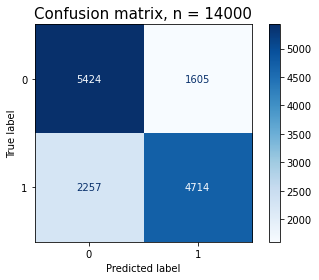

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plot_confusion_matrix(logistic, X_test_encoded, y_test, 
                      cmap=plt.cm.Blues,
                      ax=ax)
plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=15)
plt.show()

### **4-2. 평가지표**
- 테스트 데이터에 대하여 Logistic Regression 모델의 정확도, 정밀도, 재현율, F1 점수를 구하세요. 

##### **Q4. 테스트 데이터의 정확도를 반올림하여 소수점 둘째 자리까지 제출해 주세요.**

In [ ]:
y_test_pred = logistic.predict(X_test_encoded)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      7029
           1       0.75      0.68      0.71      6971

    accuracy                           0.72     14000
   macro avg       0.73      0.72      0.72     14000
weighted avg       0.73      0.72      0.72     14000



### **4-4. AUC**
- 테스트 데이터에 대하여 Logistic Regression 모델의 AUC score를 구하세요.

##### **Q5. 테스트 데이터의 AUC score를 반올림하여 소수점 둘째 자리까지 제출해 주세요.**

In [ ]:
# auc score

from sklearn.metrics import roc_auc_score

y_pred_proba = logistic.predict_proba(X_test_encoded)[:,1] 

auc = roc_auc_score(y_test, y_pred_proba)
print(f"Logistic Regression의 auc score : {auc}")

Logistic Regression의 auc score : 0.7848688484632971


# 🥇 **도전 과제**

## **Part 5. 최적화**
'최적화'가 어떤 작업을 의미하는지 다양하게 생각해 봅니다. 
- Logistic Regression 모델을 최적화 시킨 후 검증 데이터의 정확도를 확인해 보고, 테스트 데이터에서 딱 한 번 정확도를 측정하세요.
  - [`LogisticRegressionCV`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html) 에서 하이퍼파라미터 `Cs`에 대해 알아보세요.
  - 가장 성능이 좋은 `Cs` 값을 찾아 테스트 데이터의 정확도를 측정하세요. 
  - **4-2**의 결과와 비교해 보세요. 